In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(8.0, 5.5))
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [3]:
from pathlib import Path

# path: the path relative to desktop
def plt_savefig(path):

    return plt.savefig(
        (Path('~/Desktop') / path).expanduser(),
        bbox_inches='tight',  # or the labels will be cut
        dpi=600
    )

In [4]:
df_fair = sm.datasets.fair.load_pandas().data
df_fair_sample = df_fair.sample(frac=0.10, random_state=20190430)

In [5]:
df = df_fair

alpha = 0.05
a = df.affairs.quantile(alpha/2)
b = df.affairs.quantile(1-alpha/2)

df = df[(df.affairs >= a) & (df.affairs <= b)]
print(f'Kept {df.shape[0] / df_fair.shape[0]:.2%} of the data.')

print()
df_fair_middle95 = df

Kept 97.53% of the data.



In [6]:
df = df_fair_sample

alpha = 0.05
a = df.affairs.quantile(alpha/2)
b = df.affairs.quantile(1-alpha/2)

df = df[(df.affairs >= a) & (df.affairs <= b)]
print(f'Kept {df.shape[0] / df_fair.shape[0]:.2%} of the data.')

print()
df_fair_sample_middle95 = df

Kept 9.77% of the data.



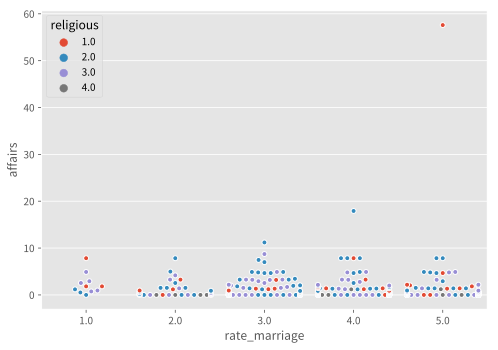

In [7]:
df = df_fair_sample
sns.swarmplot(data=df, x='rate_marriage', y='affairs', hue='religious', edgecolor='white', linewidth=1)

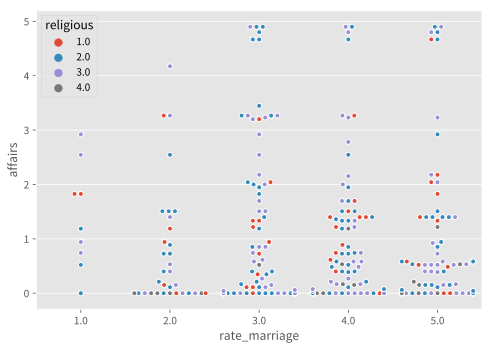

In [8]:
df = df_fair_sample_middle95
sns.swarmplot(data=df, x='rate_marriage', y='affairs', hue='religious', edgecolor='white', linewidth=1)

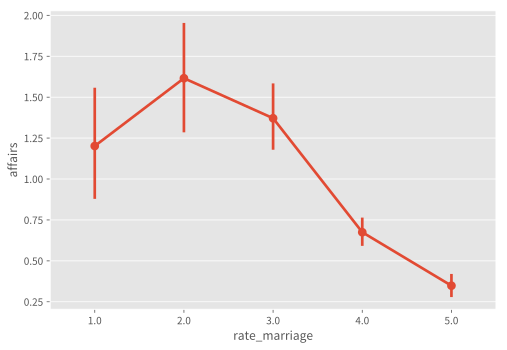

In [9]:
df = df_fair
sns.pointplot(data=df, x='rate_marriage', y='affairs')

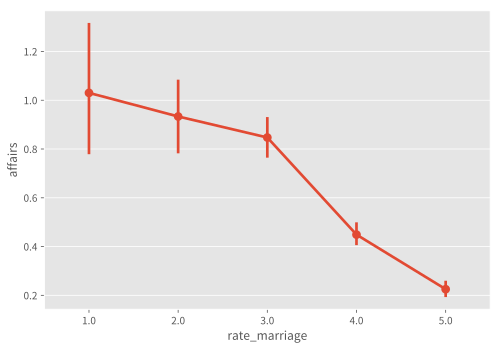

In [10]:
df = df_fair_middle95
sns.pointplot(data=df, x='rate_marriage', y='affairs')

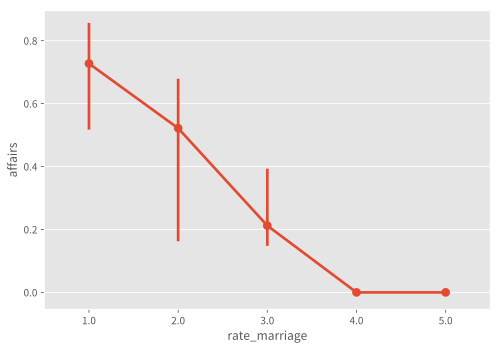

In [11]:
df = df_fair
sns.pointplot(data=df, x='rate_marriage', y='affairs', estimator=np.median)

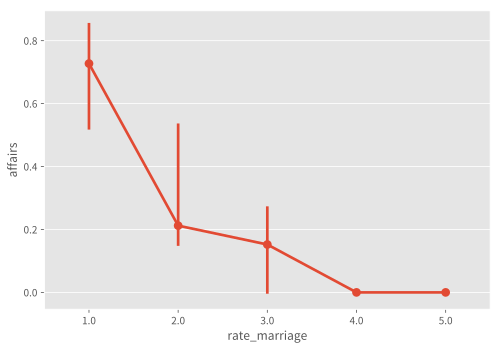

In [12]:
df = df_fair_middle95
sns.pointplot(data=df, x='rate_marriage', y='affairs', estimator=np.median)

In [13]:
%%time
df = df_fair
display(smf.ols('affairs ~ C(rate_marriage) + C(rate_marriage):C(religious)', df).fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     19.95
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.46e-66
Time:                        16:22:42   Log-Likelihood:                -13877.
No. Observations:                6366   AIC:                         2.779e+04
Df Residuals:                    6346   BIC:                         2.793e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     1.3341      0.505      2.640      0.008       0.344       2.325
C(rate_marriage)[T.2.0]                       1.9654      0.581      3.384      0.001       0.827       3.104
C(rate_marriage)[T.3.0]                       1.0479      0.530      1.977      0.048       0.009       2.087
C(rate_marriage)[T.4.0]                      -0.3282      0.518     -0.633      0.527      -1.344       0.688
C(rate_marriage)[T.5.0]                      -0.6430      0.516     -1.246      0.213      -1.654       0.368
C(rate_marriage)[1.0]:C(religious)[T.2.0]     0.1143      0.619      0.185      0.853      -1.099       1.327
C(rate_marriage)[2.0]:C(religious)[T.2.0]    -1.6960      0.337     -5.034      0.000      -2.356      -1.035
C(rate_marriage)[3.0]:C(religious)[T.2.0]    -1.0762      0.193     -5.574      0.000      -1.455      -0.698
C(rate_marriage)[4.0]:C(religious)[T.2.0]    -0.2356      0.137     -1.719      0.086      -0.504       0.033
C(rate_marriage)[5.0]:C(religious)[T.2.0]    -0.3539      0.128     -2.774      0.006      -0.604      -0.104
C(rate_marriage)[1.0]:C(religious)[T.3.0]    -0.3413      0.613     -0.556      0.578      -1.544       0.861
C(rate_marriage)[2.0]:C(religious)[T.3.0]    -2.2120      0.346     -6.385      0.000      -2.891      -1.533
C(rate_marriage)[3.0]:C(religious)[T.3.0]    -1.3154      0.198     -6.646      0.000      -1.703      -0.927
C(rate_marriage)[4.0]:C(religious)[T.3.0]    -0.4746      0.136     -3.487      0.000      -0.741      -0.208
C(rate_marriage)[5.0]:C(religious)[T.3.0]    -0.3861      0.124     -3.124      0.002      -0.628      -0.144
C(rate_marriage)[1.0]:C(religious)[T.4.0]    -0.6082      0.955     -0.637      0.524      -2.480       1.264
C(rate_marriage)[2.0]:C(religious)[T.4.0]    -2.8273      0.516     -5.483      0.000      -3.838      -1.817
C(rate_marriage)[3.0]:C(religious)[T.4.0]    -1.7089      0.302     -5.651      0.000      -2.302      -1.116
C(rate_marriage)[4.0]:C(religious)[T.4.0]    -0.7028      0.196     -3.593      0.000      -1.086      -0.319
C(rate_marriage)[5.0]:C(religious)[T.4.0]    -0.5886      0.153     -3.857      0.000      -0.888      -0.289
==============================================================================
Omnibus:                     9360.488   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5123160.759
Skew:                           8.770   Prob(JB):                         0.00
Kurtosis:                     140.865   Cond. No.                         66.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors 

CPU times: user 239 ms, sys: 33.4 ms, total: 272 ms
Wall time: 82.9 ms


In [14]:
%%time
df = df_fair_middle95
display(smf.ols('affairs ~ C(rate_marriage) + C(rate_marriage):C(religious)', df).fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     26.29
Date:                Wed, 01 May 2019   Prob (F-statistic):           5.18e-90
Time:                        16:22:42   Log-Likelihood:                -8571.1
No. Observations:                6209   AIC:                         1.718e+04
Df Residuals:                    6189   BIC:                         1.732e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     0.9514      0.234      4.070      0.000       0.493       1.410
C(rate_marriage)[T.2.0]                       0.2659      0.274      0.972      0.331      -0.270       0.802
C(rate_marriage)[T.3.0]                       0.0720      0.246      0.293      0.770      -0.410       0.554
C(rate_marriage)[T.4.0]                      -0.3232      0.240     -1.349      0.177      -0.793       0.147
C(rate_marriage)[T.5.0]                      -0.5738      0.239     -2.406      0.016      -1.041      -0.106
C(rate_marriage)[1.0]:C(religious)[T.2.0]     0.2184      0.285      0.767      0.443      -0.340       0.777
C(rate_marriage)[2.0]:C(religious)[T.2.0]    -0.2828      0.164     -1.720      0.085      -0.605       0.039
C(rate_marriage)[3.0]:C(religious)[T.2.0]    -0.1875      0.091     -2.058      0.040      -0.366      -0.009
C(rate_marriage)[4.0]:C(religious)[T.2.0]    -0.1038      0.063     -1.657      0.098      -0.227       0.019
C(rate_marriage)[5.0]:C(religious)[T.2.0]    -0.1448      0.058     -2.500      0.012      -0.258      -0.031
C(rate_marriage)[1.0]:C(religious)[T.3.0]     0.0414      0.281      0.147      0.883      -0.510       0.593
C(rate_marriage)[2.0]:C(religious)[T.3.0]    -0.2983      0.168     -1.780      0.075      -0.627       0.030
C(rate_marriage)[3.0]:C(religious)[T.3.0]    -0.1791      0.093     -1.924      0.054      -0.362       0.003
C(rate_marriage)[4.0]:C(religious)[T.3.0]    -0.2725      0.062     -4.386      0.000      -0.394      -0.151
C(rate_marriage)[5.0]:C(religious)[T.3.0]    -0.1700      0.056     -3.030      0.002      -0.280      -0.060
C(rate_marriage)[1.0]:C(religious)[T.4.0]    -0.2255      0.433     -0.521      0.602      -1.074       0.623
C(rate_marriage)[2.0]:C(religious)[T.4.0]    -0.7451      0.239     -3.111      0.002      -1.215      -0.276
C(rate_marriage)[3.0]:C(religious)[T.4.0]    -0.5095      0.140     -3.645      0.000      -0.784      -0.235
C(rate_marriage)[4.0]:C(religious)[T.4.0]    -0.4059      0.089     -4.571      0.000      -0.580      -0.232
C(rate_marriage)[5.0]:C(religious)[T.4.0]    -0.2917      0.069     -4.225      0.000      -0.427      -0.156
==============================================================================
Omnibus:                     3531.308   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25198.352
Skew:                           2.733   Prob(JB):                         0.00
Kurtosis:                      11.218   Cond. No.                         67.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors 

CPU times: user 288 ms, sys: 39.7 ms, total: 327 ms
Wall time: 81.9 ms


In [15]:
%%time
df = df_fair
display(smf.quantreg('affairs ~ C(rate_marriage) + C(rate_marriage):C(religious)', df).fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                affairs   Pseudo R-squared:              0.01629
Model:                       QuantReg   Bandwidth:                     0.06262
Method:                 Least Squares   Sparsity:                       0.1391
Date:                Wed, 01 May 2019   No. Observations:                 6366
Time:                        16:22:42   Df Residuals:                     6346
                                        Df Model:                           19
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     0.7205      0.016     43.945      0.000       0.688       0.753
C(rate_marriage)[T.2.0]                       0.4674      0.019     24.800      0.000       0.430       0.504
C(rate_marriage)[T.3.0]                      -0.1051      0.017     -6.109      0.000      -0.139      -0.071
C(rate_marriage)[T.4.0]                      -0.7205      0.017    -42.845      0.000      -0.753      -0.688
C(rate_marriage)[T.5.0]                      -0.7205      0.017    -43.039      0.000      -0.753      -0.688
C(rate_marriage)[1.0]:C(religious)[T.2.0]    -0.1371      0.020     -6.830      0.000      -0.177      -0.098
C(rate_marriage)[2.0]:C(religious)[T.2.0]    -0.6045      0.011    -55.294      0.000      -0.626      -0.583
C(rate_marriage)[3.0]:C(religious)[T.2.0]    -0.3462      0.006    -55.254      0.000      -0.358      -0.334
C(rate_marriage)[4.0]:C(religious)[T.2.0] -1.745e-08      0.004  -3.92e-06      1.000      -0.009       0.009
C(rate_marriage)[5.0]:C(religious)[T.2.0] -1.439e-07      0.004  -3.48e-05      1.000      -0.008       0.008
C(rate_marriage)[1.0]:C(religious)[T.3.0]     0.1260      0.020      6.329      0.000       0.087       0.165
C(rate_marriage)[2.0]:C(religious)[T.3.0]    -0.7879      0.011    -70.083      0.000      -0.810      -0.766
C(rate_marriage)[3.0]:C(religious)[T.3.0]    -0.4632      0.006    -72.125      0.000      -0.476      -0.451
C(rate_marriage)[4.0]:C(religious)[T.3.0]  -2.12e-07      0.004   -4.8e-05      1.000      -0.009       0.009
C(rate_marriage)[5.0]:C(religious)[T.3.0] -1.733e-07      0.004  -4.32e-05      1.000      -0.008       0.008
C(rate_marriage)[1.0]:C(religious)[T.4.0]    -0.3727      0.031    -12.027      0.000      -0.433      -0.312
C(rate_marriage)[2.0]:C(religious)[T.4.0]    -1.1879      0.017    -70.998      0.000      -1.221      -1.155
C(rate_marriage)[3.0]:C(religious)[T.4.0]    -0.6154      0.010    -62.709      0.000      -0.635      -0.596
C(rate_marriage)[4.0]:C(religious)[T.4.0]  -3.24e-07      0.006  -5.11e-05      1.000      -0.012       0.012
C(rate_marriage)[5.0]:C(religious)[T.4.0]   -2.8e-07      0.005  -5.65e-05      1.000      -0.010       0.010
=============================================================================================================
"""

CPU times: user 494 ms, sys: 61.9 ms, total: 556 ms
Wall time: 141 ms


In [16]:
%%time
df = df_fair
display(smf.rlm('affairs ~ C(rate_marriage) + C(rate_marriage):C(religious)', df).fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                affairs   No. Observations:                 6366
Model:                            RLM   Df Residuals:                     6346
Method:                          IRLS   Df Model:                           19
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 01 May 2019                                         
Time:                        16:22:43                                         
No. Iterations:                    50                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     0.5199      0.048     10.872      0.000       0.426       0.614
C(rate_marriage)[T.2.0]                       0.7114      0.055     12.942      0.000       0.604       0.819
C(rate_marriage)[T.3.0]                       0.1261      0.050      2.513      0.012       0.028       0.224
C(rate_marriage)[T.4.0]                      -0.4055      0.049     -8.269      0.000      -0.502      -0.309
C(rate_marriage)[T.5.0]                      -0.4489      0.049     -9.194      0.000      -0.545      -0.353
C(rate_marriage)[1.0]:C(religious)[T.2.0]     0.1238      0.059      2.113      0.035       0.009       0.239
C(rate_marriage)[2.0]:C(religious)[T.2.0]    -0.6783      0.032    -21.270      0.000      -0.741      -0.616
C(rate_marriage)[3.0]:C(religious)[T.2.0]    -0.3828      0.018    -20.952      0.000      -0.419      -0.347
C(rate_marriage)[4.0]:C(religious)[T.2.0]    -0.0063      0.013     -0.482      0.630      -0.032       0.019
C(rate_marriage)[5.0]:C(religious)[T.2.0]    -0.0267      0.012     -2.212      0.027      -0.050      -0.003
C(rate_marriage)[1.0]:C(religious)[T.3.0]     0.2645      0.058      4.556      0.000       0.151       0.378
C(rate_marriage)[2.0]:C(religious)[T.3.0]    -0.9004      0.033    -27.463      0.000      -0.965      -0.836
C(rate_marriage)[3.0]:C(religious)[T.3.0]    -0.4475      0.019    -23.891      0.000      -0.484      -0.411
C(rate_marriage)[4.0]:C(religious)[T.3.0]    -0.0401      0.013     -3.116      0.002      -0.065      -0.015
C(rate_marriage)[5.0]:C(religious)[T.3.0]    -0.0326      0.012     -2.784      0.005      -0.055      -0.010
C(rate_marriage)[1.0]:C(religious)[T.4.0]    -0.1362      0.090     -1.507      0.132      -0.313       0.041
C(rate_marriage)[2.0]:C(religious)[T.4.0]    -1.1305      0.049    -23.168      0.000      -1.226      -1.035
C(rate_marriage)[3.0]:C(religious)[T.4.0]    -0.5140      0.029    -17.957      0.000      -0.570      -0.458
C(rate_marriage)[4.0]:C(religious)[T.4.0]    -0.0616      0.019     -3.327      0.001      -0.098      -0.025
C(rate_marriage)[5.0]:C(religious)[T.4.0]    -0.0533      0.014     -3.693      0.000      -0.082      -0.025
=============================================================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

CPU times: user 890 ms, sys: 177 ms, total: 1.07 s
Wall time: 272 ms


In [17]:
df = df_fair
res_ols = smf.ols('affairs ~ C(rate_marriage) + C(rate_marriage):C(religious)', df).fit()
res_ols_middle95 = smf.ols('affairs ~ C(rate_marriage) + C(rate_marriage):C(religious)', df_fair_middle95).fit()
res_qr = smf.quantreg('affairs ~ C(rate_marriage) + C(rate_marriage):C(religious)', df).fit()
res_rlm = smf.rlm('affairs ~ C(rate_marriage) + C(rate_marriage):C(religious)', df).fit()

Text(0.5, 1.0, 'Params')

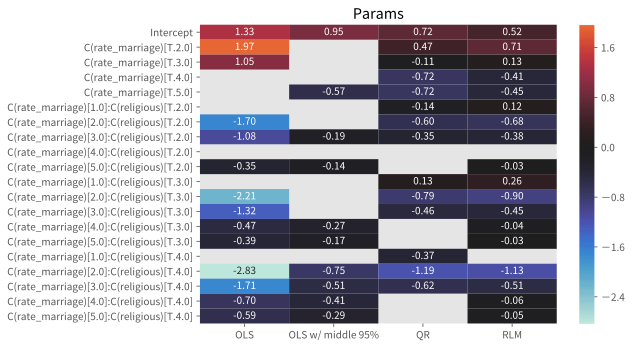

In [18]:
params_ols = res_ols.params
params_ols_middle95 = res_ols_middle95.params
params_qr = res_qr.params
params_rlm = res_rlm.params

params_ols[res_ols.pvalues >= 0.05] = np.nan
params_ols_middle95[res_ols_middle95.pvalues >= 0.05] = np.nan
params_qr[res_qr.pvalues >= 0.05] = np.nan
params_rlm[res_rlm.pvalues >= 0.05] = np.nan

df = (
    params_ols.to_frame('OLS')
    .join(params_ols_middle95.to_frame('OLS w/ middle 95%'))
    .join(params_qr.to_frame('QR'))
    .join(params_rlm.to_frame('RLM'))
)

sns.heatmap(df, center=0, annot=True, fmt='.2f')
plt.title('Params')

# plt_savefig('ols_olsm_qr_rlm.png')